In [8]:
#Feature selection using principal component analysis
import numpy as np
from pandas import read_csv
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [3]:
#Input data
data = read_csv('rent_clean.csv')
data.head()


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (39,50,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,web_alberlet,web_ingatlan,web_tower,apartment,house,sale,rent,price_per_month,size(sqm),...,orientation_northeast,orientation_northwest,orientation_southwest,orientation_southeast,garden_access,garden_AC,attic,attic_loft_conversion,attic_penthouse,attic_topfloor
0,0,1.0,0.0,0.0,1,0,0,1,386,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0.0,0.0,1,0,0,1,773,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.0,0.0,0.0,1,0,0,1,464,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.0,0.0,0.0,1,0,0,1,835,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,0.0,0.0,1,0,0,1,773,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Drop NaN items
test = data[['price_per_sqm', 'apartment', 'house', 'sale', 'rent', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'attic_loft_conversion', 'parking']]
test = test.dropna()

X = test[['apartment', 'house', 'sale', 'rent', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'attic_loft_conversion', 'parking']]
y = test[['price_per_sqm']]


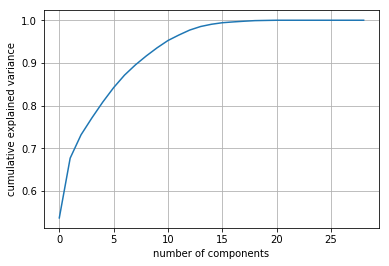

In [7]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()


In [28]:
#Feature extraction
my_model = PCA(n_components = 15)
fit = my_model.fit(X)

print('Explained Variance:', fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [0.53657222 0.14011205 0.05470261 0.03963705 0.03714616 0.03388643
 0.02927222 0.02396863 0.02099549 0.01912478 0.01709278 0.0128201
 0.011678   0.00828466 0.00529527]
[[ 2.22044605e-16 -1.08420217e-19  1.05879118e-22 -1.65436123e-24
  -2.33491637e-02  9.84198428e-01 -5.66142521e-04  1.64976914e-02
   7.70371978e-34 -5.54856243e-02  4.77875918e-02  8.64802099e-03
   0.00000000e+00  1.09423204e-01  3.45401411e-02 -7.07412803e-03
  -1.96161737e-02  0.00000000e+00 -6.61430114e-02  1.09256754e-03
   5.16775032e-02 -3.04512558e-03 -1.45805161e-03 -1.82050264e-03
   3.04383182e-02  5.70068270e-02 -1.49790287e-02  5.94749015e-03
   0.00000000e+00]
 [-1.68051337e-18  1.11022302e-16  0.00000000e+00 -2.16840434e-19
   9.17159309e-01  1.54135264e-02 -2.39446031e-01 -5.65092548e-02
   5.16987883e-26 -5.97580652e-02  1.40504222e-01 -7.49384159e-02
  -9.86076132e-32  2.74770025e-02  1.41504970e-01  1.53347889e-01
  -3.93739146e-02  0.00000000e+00  1.20785844e-01 -2.48648583e-04
 

In [27]:
#Feature extraction
my_model = PCA(n_components = 16)
fit = my_model.fit(X)

print('Explained Variance:', fit.explained_variance_ratio_)
print(fit.components_)


Explained Variance: [0.53657222 0.14011205 0.05470261 0.03963705 0.03714616 0.03388643
 0.02927222 0.02396863 0.02099549 0.01912478 0.01709278 0.0128201
 0.011678   0.00828466 0.00529527 0.00359603]
[[ 2.22044605e-16 -1.08420217e-19  4.23516474e-22  0.00000000e+00
  -2.33491637e-02  9.84198428e-01 -5.66142521e-04  1.64976914e-02
   0.00000000e+00 -5.54856243e-02  4.77875918e-02  8.64802099e-03
   1.14794370e-41  1.09423204e-01  3.45401411e-02 -7.07412803e-03
  -1.96161737e-02  5.22024357e-54 -6.61430114e-02  1.09256754e-03
   5.16775032e-02 -3.04512558e-03 -1.45805161e-03 -1.82050264e-03
   3.04383182e-02  5.70068270e-02 -1.49790287e-02  5.94749015e-03
   0.00000000e+00]
 [-4.98732999e-18 -3.33066907e-16  3.46944695e-18  0.00000000e+00
   9.17159309e-01  1.54135264e-02 -2.39446031e-01 -5.65092548e-02
   0.00000000e+00 -5.97580652e-02  1.40504222e-01 -7.49384159e-02
  -7.88860905e-31  2.74770025e-02  1.41504970e-01  1.53347889e-01
  -3.93739146e-02  9.18354962e-41  1.20785844e-01 -2.486

In [12]:
features = ['apartment', 'house', 'sale', 'rent', 'number_of_whole_rooms', 'floor', 'number_of_half_rooms', 'furnish_furnished', 'furnish_partly_furnished', 'view_garden', 'view_panoramic', 'view_street', 'balcony', 'lift', 'air_conditioner', 'utility_double_comfort', 'heating_gas', 'heating_wall_heating', 'heating_combination', 'heating_ceiling', 'heating_central_heating', 'heating_electric', 'heating_floor', 'heating_circulating', 'heating_district', 'available_immediately', 'condition_of_property_renovated', 'attic_loft_conversion', 'parking']
rf = RandomForestRegressor()
rf.fit(X, y)
print("Features sorted by their score:")
list(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features), reverse=True))


Features sorted by their score:


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[(0.1716, 'floor'),
 (0.1268, 'air_conditioner'),
 (0.1089, 'number_of_whole_rooms'),
 (0.0612, 'number_of_half_rooms'),
 (0.0524, 'condition_of_property_renovated'),
 (0.0495, 'heating_combination'),
 (0.0493, 'lift'),
 (0.0486, 'available_immediately'),
 (0.048, 'utility_double_comfort'),
 (0.0466, 'attic_loft_conversion'),
 (0.0446, 'furnish_furnished'),
 (0.0435, 'view_panoramic'),
 (0.0416, 'heating_central_heating'),
 (0.0278, 'view_street'),
 (0.0231, 'heating_district'),
 (0.0192, 'view_garden'),
 (0.0123, 'heating_circulating'),
 (0.0115, 'heating_electric'),
 (0.0107, 'heating_gas'),
 (0.0026, 'heating_ceiling'),
 (0.0005, 'heating_floor'),
 (0.0, 'sale'),
 (0.0, 'rent'),
 (0.0, 'parking'),
 (0.0, 'house'),
 (0.0, 'heating_wall_heating'),
 (0.0, 'furnish_partly_furnished'),
 (0.0, 'balcony'),
 (0.0, 'apartment')]